## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.


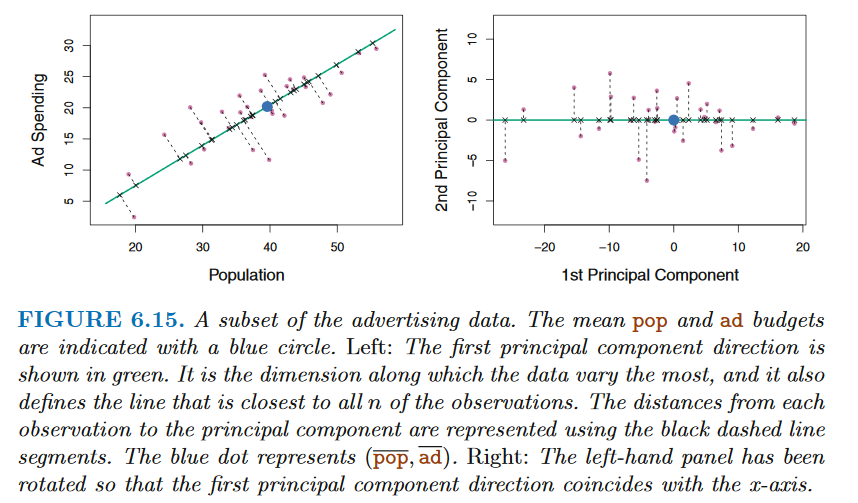

In [71]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [72]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### Análisis Exploratorio de Datos

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

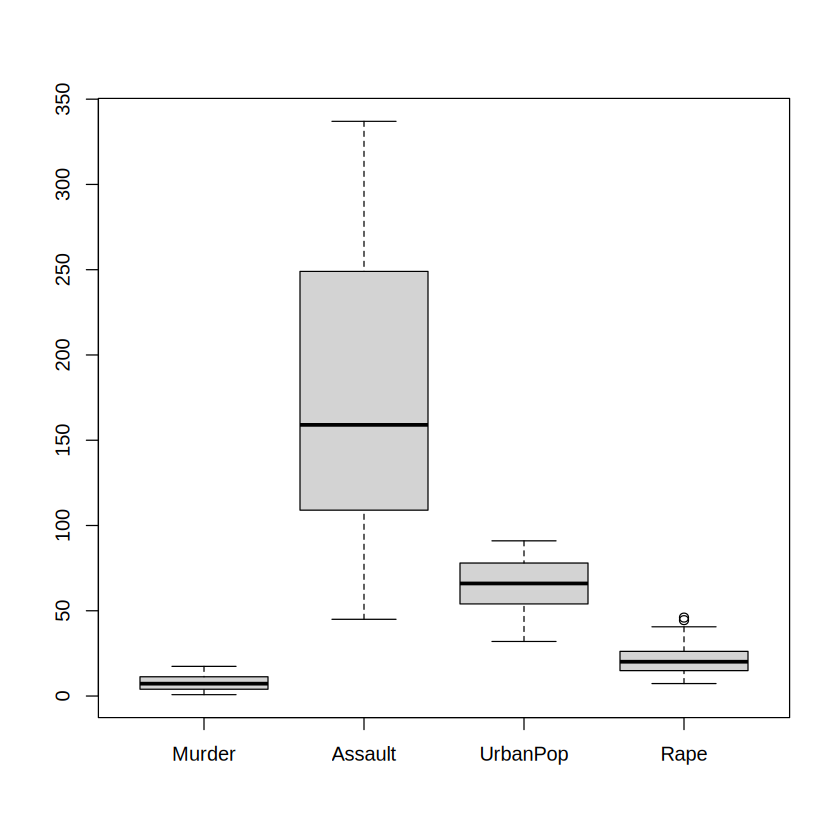

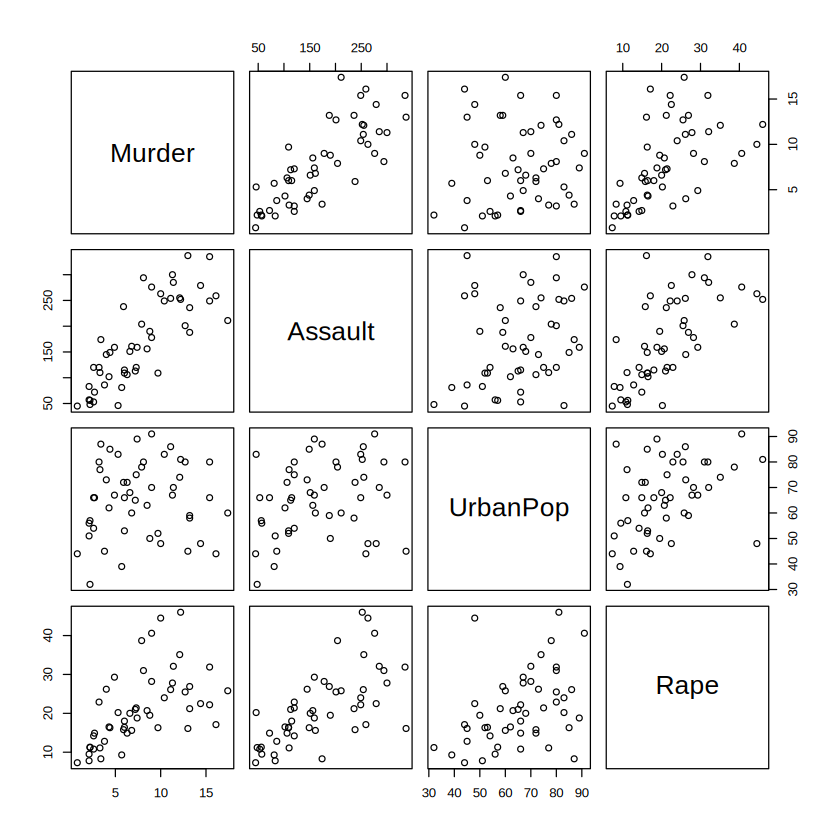

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


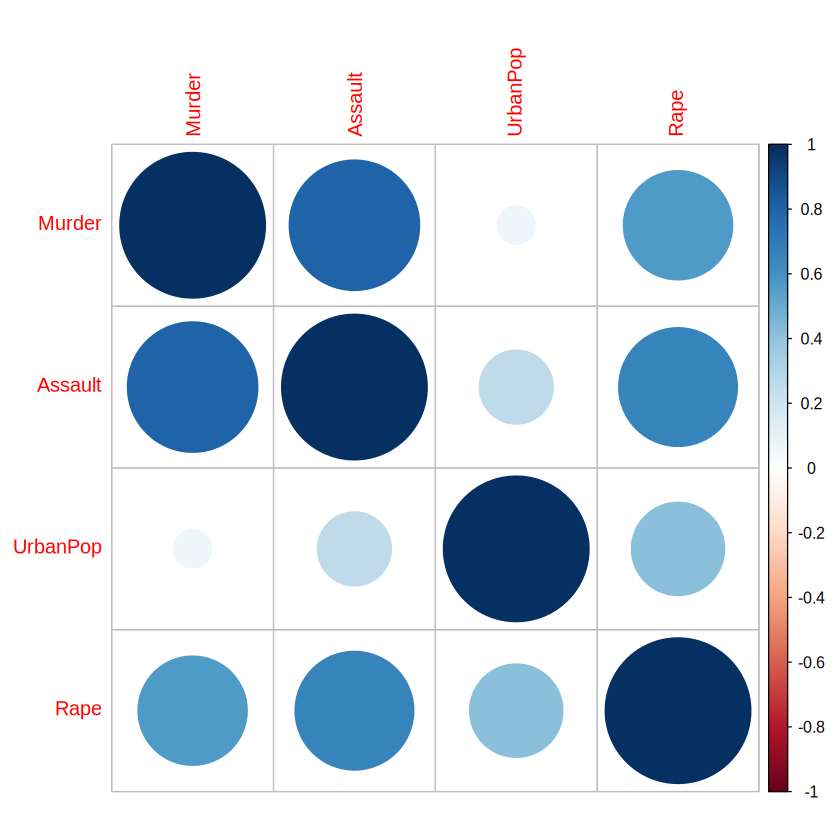

In [73]:
#install.packages('corrplot')
library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
corrplot(mcor)
print(mcor)



In [74]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests, 2, mean)



Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [75]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


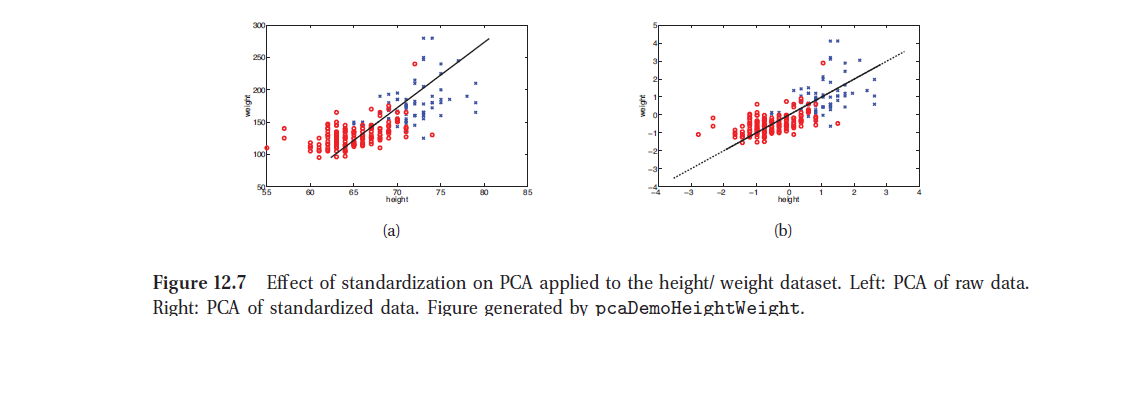

In [76]:
display_png(file="figura2.png")

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [77]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [78]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [79]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


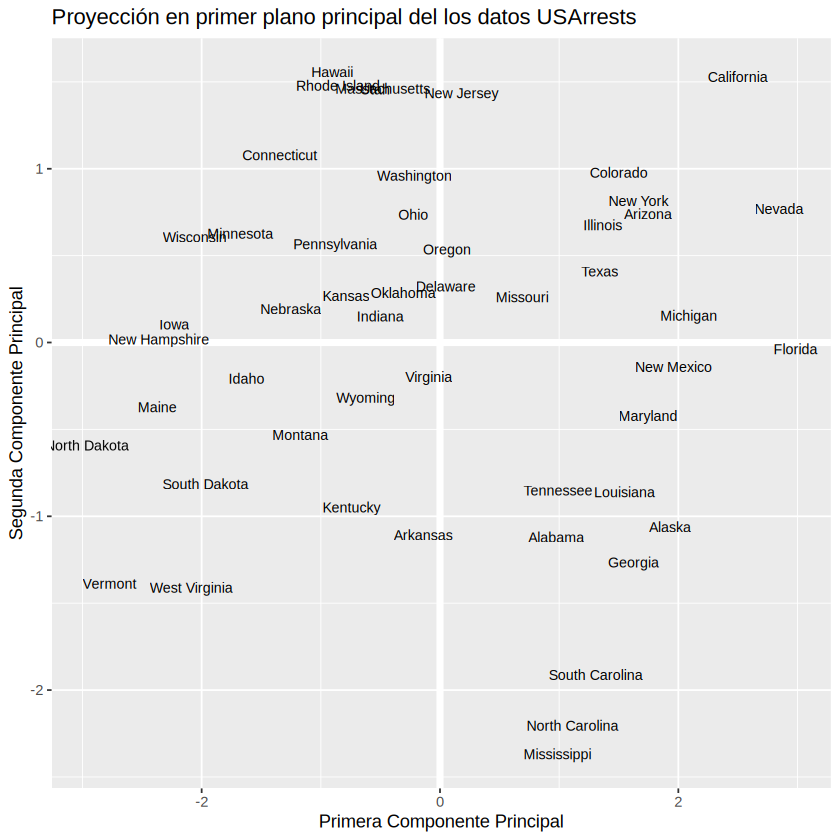

In [80]:
#install.packages('ggplot2')
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

In [81]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

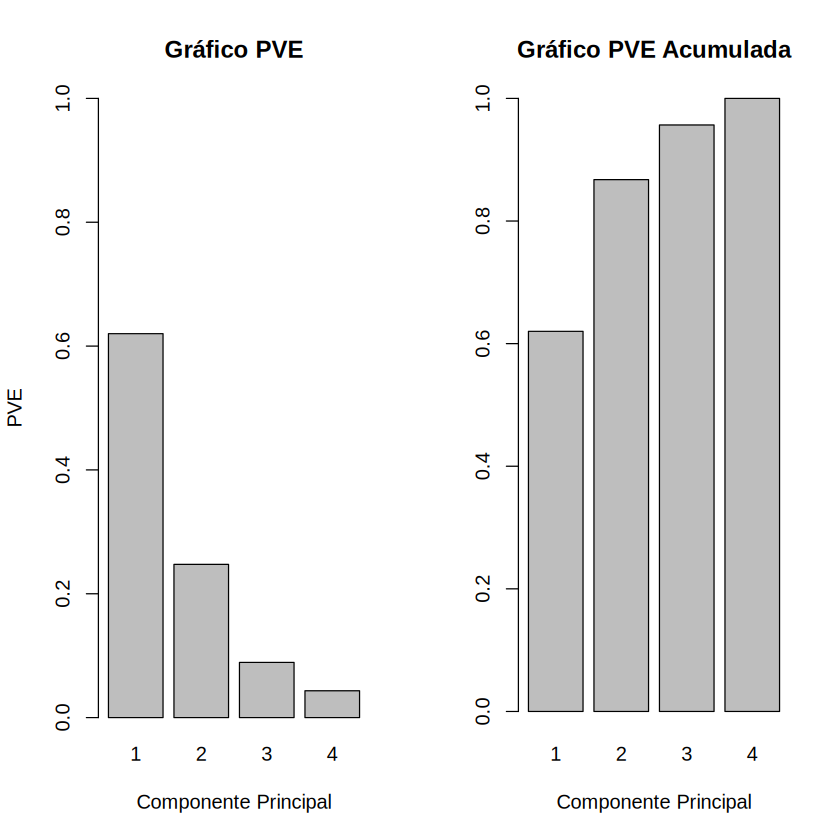

In [82]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4)) # nolint
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4)) # nolint


## Ahora con las funciones predefinidas en R

In [83]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

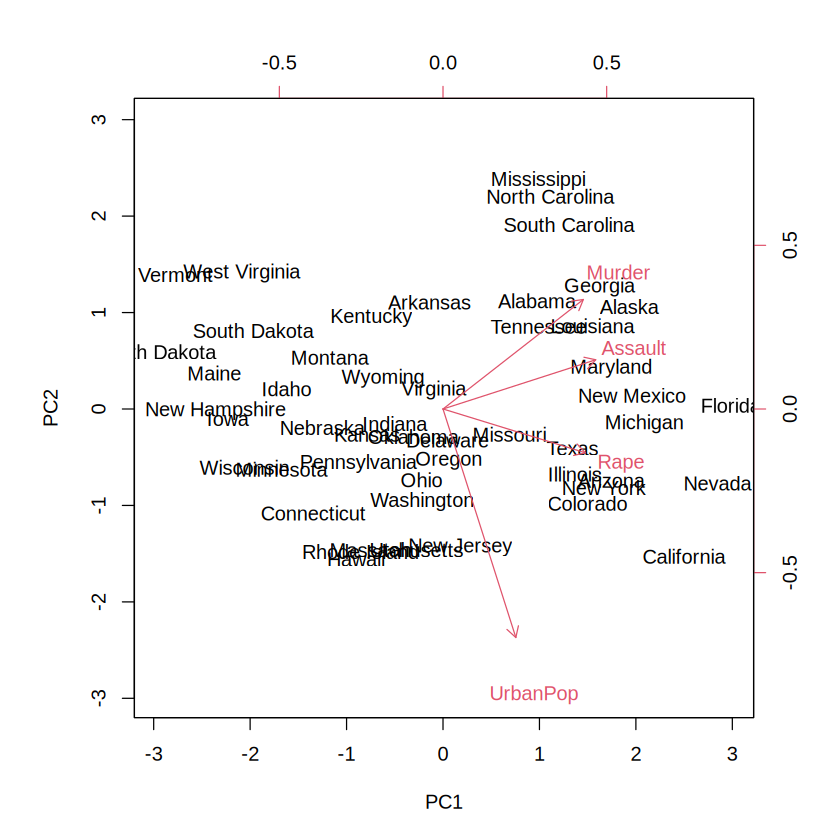

In [84]:
biplot(pca_res, scale = 0)

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.
2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


### 1
Del grafico podemos ver que los estados (la muestra) son representados en una bidimensionalidad simple como puntos y las variables representada como vectores (flechas rojas), entre más juntos estén los puntos más patrones de datos similares tendrán y mientras. Por ejemplo, podemos ver que el estado de Georgia tiene las tasas de asesinatos mas altas, que california y new jersey son estados que están en la misma dirección que el vector urbanpop o que nevada es el estado con más violaciones.

### 2
Al hacer la comparación con los cálculos previos podemos encontrar muchísimas semejanzas y poder concluir que lo proporcionado por el grafico es muy acertado.

   sdev: es el componente que contiene las deviaciones estándar de los nuevos componentes principales

   rotation: es el componente que contiene los vectores de las variables originales en las principales

   center: es el componente que contiene las medias de las variables originales antes de la estandarización

   scale: es el componente que contiene las desviaciones estándar de las variables originales antes de la estandarización

   x: es el componente que contiene las coordenadas de observaciones en el espacio de componentes principales, son las observaciones

### 3
  se uso el princomp y se obtuvo el siguiente grafico: 

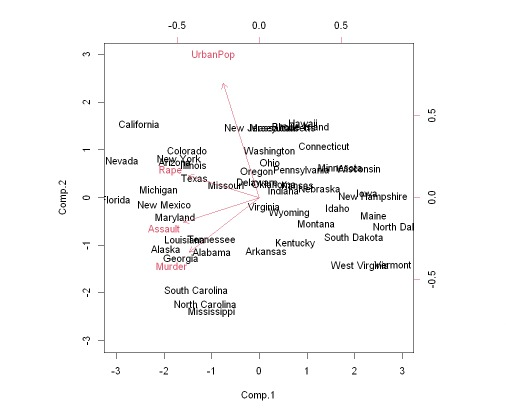

In [100]:
display_png(file = "image3.jpg")

  y aunque se vea de esa manera la manera de ser interpretada es la misma y da los mismos resultados, por lo cual entre princomp
  prcomp no hay diferencias significativas que afecten los resultados.

#### Ejercicio 4:
Considere los datos adjuntos provenientes de una muestra de canciones de spotify, recolectadas por kaggle.com, que incluye para cada canción 11 características (columnas 4 a la 14). Se trata de realizar un análisis exploratorio de estos datos incluyendo un PCA. 

Entre las características disponibles hay algunas que son calculadas por el propio algoritmo de Spotify, y por lo tanto, tienen cierto grado de subjetividad, como son: acousticness, danceability, energy, instrumentalness, liveness, speechiness y valence.

Por otra parte hay otras variables objetivas como duration_ms, tempo y loudness. Son atributos de una canción que no están sujetos a interpretación del algoritmo. Por ejemplo, la duración es la que tenga la pista y el tempo será el que determine un metrónomo.

Por último se consigna la variable popularity, cuyo valor está basado en datos reales de reproducción, pero ponderada por la cercanía en el tiempo (reproducciones más recientes tienen mayor peso a la hora de calcular la popularidad).



In [85]:
library(ggplot2)
datos <- read.csv("../data/tiposMusica.csv",dec=".",sep=";",header=TRUE)
print(datos[1:10,])

       genre             artist_name
1  Classical Wolfgang Amadeus Mozart
2  Classical Wolfgang Amadeus Mozart
3  Classical Wolfgang Amadeus Mozart
4  Classical   Fr\x82d\x82ric Chopin
5  Classical   Fr\x82d\x82ric Chopin
6  Classical   Fr\x82d\x82ric Chopin
7  Classical    Ludwig van Beethoven
8  Classical    Ludwig van Beethoven
9  Classical   Johann Sebastian Bach
10 Classical   Johann Sebastian Bach
                                                                    track_name
1                                 Grabmusik, K. 42: III. Geliebte Seel' (Live)
2          Requiem in D Minor, K. 626: IIIb. Sequence No. 2, Tuba mirum (Live)
3                                   12 Duets (No. 10 Andante) - Violin Version
4                                      Mazurkas, Op. 50: No. 2 in A-Flat Major
5                     M\x82lodies Polonaises, Op. 74: No. 9, Melodia (Lamento)
6                           Preludes, Op. 28: No. 12 in G-Sharp Minor (Presto)
7                   Fidelio, Op. 72, Act

i) Realice un análisis exploratorio de los datos de las 11 características de las canciones (columnas 4 a la 14), incluyendo resúmenes de cada variable, boxplots, correlaciones y análisis de componentes principales (PCA).

ii) Interprete sus resultados en (i). Indique cual es el interés de utilizar PCA en este conjunto de datos y si se sugiere algún tipo de limpieza de datos a partir del análisis realizado.

<h1> Desarrollo </h1>

<h2> i) </h2>

Antes de empezar a hacer un analisis, es importante recalcar que la variable duracion, esta en otra escala, es por esto que primero escalaremos los datos.

popularity     acousticness     danceability      duration_ms 
    3.554919e+02     1.645395e-01     3.164554e-02     1.665968e+10 
          energy instrumentalness         liveness         loudness 
    9.100875e-02     1.612471e-01     2.665673e-02     1.023674e+02 
     speechiness            tempo          valence 
    1.185599e-03     7.236191e+02     5.846910e-02

popularity     acousticness     danceability      duration_ms 
    3.883221e+01     6.097781e-01     3.925517e-01     2.192315e+05 
          energy instrumentalness         liveness         loudness 
    3.513117e-01     4.503350e-01     1.788933e-01    -1.713442e+01 
     speechiness            tempo          valence 
    5.357181e-02     1.029541e+02     2.707966e-01

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
-1.3170449,0.8190174,-0.23919961,-1.0838764,-0.9122740,-1.121475,-0.1402183,-0.4811959,-0.5335597,1.3787990,-0.9987295
-1.3700827,0.9398157,-0.88003816,0.3236052,-0.9149258,-1.113631,-0.5701839,-0.6026665,-0.3186467,0.7441933,0.1207729
-1.9534980,0.9472116,-0.85755259,-1.3266317,-0.3325140,1.264245,-0.4709610,0.5756674,-0.4115821,-0.1382918,-0.4582088
-0.3623653,0.9521421,-0.03120815,-0.6425736,-1.0909422,1.174594,-0.3607135,-1.2225717,2.5100736,0.3496605,-0.8357876
-0.5214786,0.9472116,-0.19422848,-0.5042481,-0.4849952,-1.121439,-0.1830924,0.3505169,-0.3070298,-0.5672111,1.0223301
-0.7336296,0.9447463,0.43536728,-1.1485378,-0.4883100,1.157162,-0.3729632,-0.4479867,0.3406136,1.3123682,-0.9553059


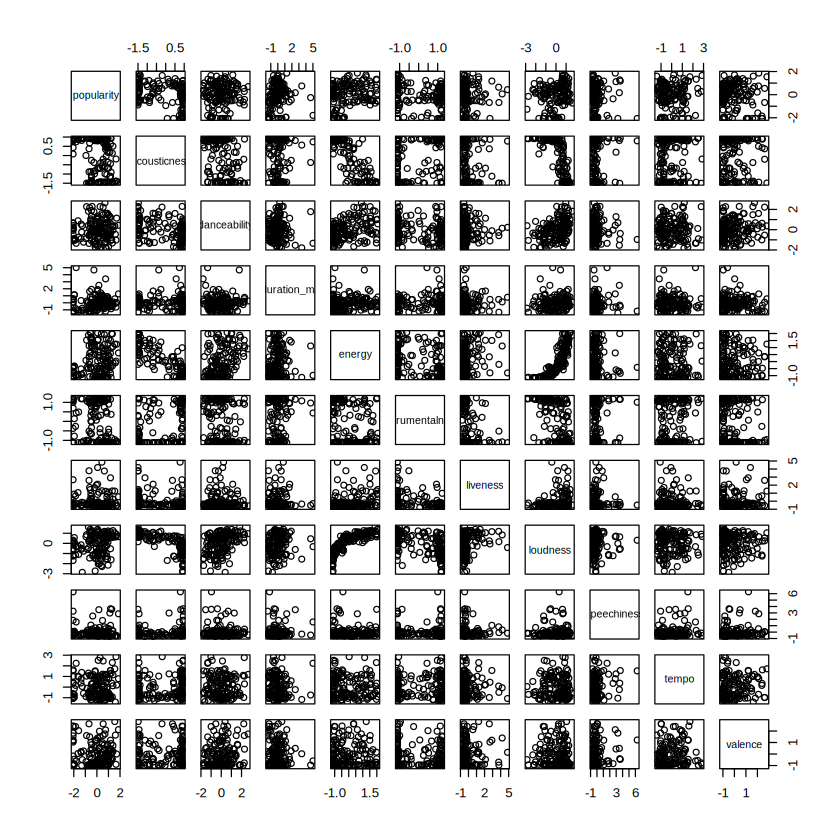

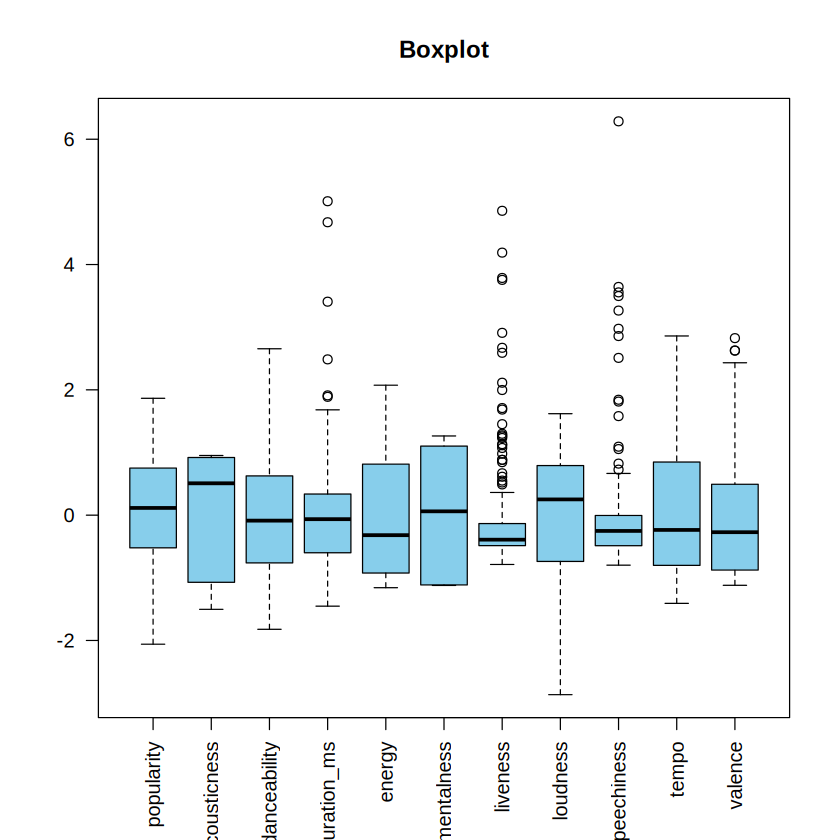

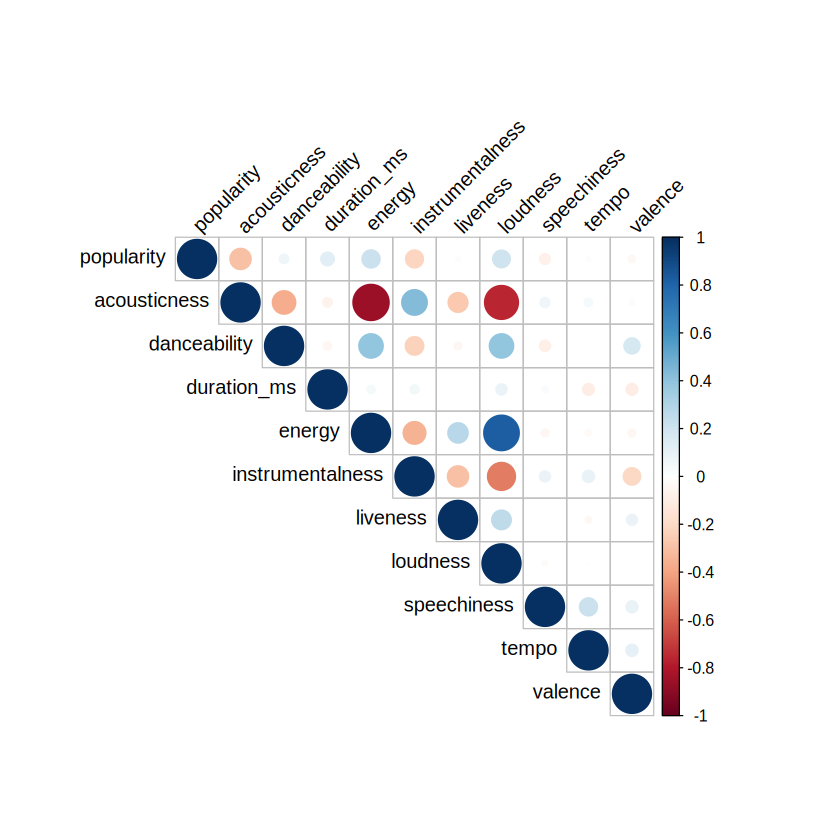

In [95]:
data <- read.csv("../data/tiposMusica.csv",dec = ".", sep = ";", header = TRUE)
apply(data[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")], 2, var) # nolint
apply(data[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")], 2, mean) # nolint

#Escalando los datos
scaled_df <- apply(data[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")], 2, scale) # nolint
correlation_matrix <- cor(data[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")]) # nolint

head(scaled_df)

plot(as.data.frame(scaled_df))

boxplot(scaled_df, las = 2, col = "skyblue", main = "Boxplot")

library(corrplot)
corrplot(correlation_matrix, method="circle", type="upper", tl.col="black", tl.srt=45) # nolint

In [87]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
songs.cov <- cov(scaled_df)
songs.eigen <- eigen(songs.cov)
songs.eigen


eigen() decomposition
$values
 [1] 3.3599123 1.3522620 1.1767559 1.0891475 0.9790349 0.9136051 0.7350638
 [8] 0.5578389 0.5137836 0.2216331 0.1009627

$vectors
             [,1]        [,2]       [,3]         [,4]        [,5]        [,6]
 [1,]  0.19022911 -0.22783795 -0.2387117 -0.152748359  0.62945651  0.49306185
 [2,] -0.48991707  0.06597132  0.1101955  0.014974507  0.11187943 -0.03350649
 [3,]  0.27731758  0.17649875  0.1119936 -0.562624930 -0.06518522 -0.33721129
 [4,]  0.03522357 -0.38653400 -0.3879865  0.203270907  0.39488605 -0.57362244
 [5,]  0.48914341 -0.04307714 -0.1438224 -0.021119101 -0.24142920 -0.02864797
 [6,] -0.34369932 -0.14659056 -0.2963609 -0.162317663 -0.31315412 -0.11220924
 [7,]  0.20343619  0.12674065  0.1993243  0.723303125 -0.07162547  0.09847098
 [8,]  0.49042831  0.01215258 -0.1041046  0.008193751 -0.11927601 -0.06093162
 [9,] -0.05832152  0.40558025 -0.5474100  0.238096946 -0.04144121 -0.24626456
[10,] -0.03983957  0.46738568 -0.4945972 -0.101021624 -0.046

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.8330064 1.1628680 1.0847838 1.0436223 0.9894619 0.9558269 0.8573586
 [8] 0.7468862 0.7167870 0.4707793 0.3177462

popularity     acousticness     danceability      duration_ms 
   -9.844847e-17    -2.002500e-17    -9.854161e-17     9.176280e-17 
          energy instrumentalness         liveness         loudness 
   -7.858647e-17    -3.413563e-17     3.672025e-17    -1.351222e-16 
     speechiness            tempo          valence 
   -2.384372e-17    -4.474772e-17    -8.726590e-17

[1] FALSE

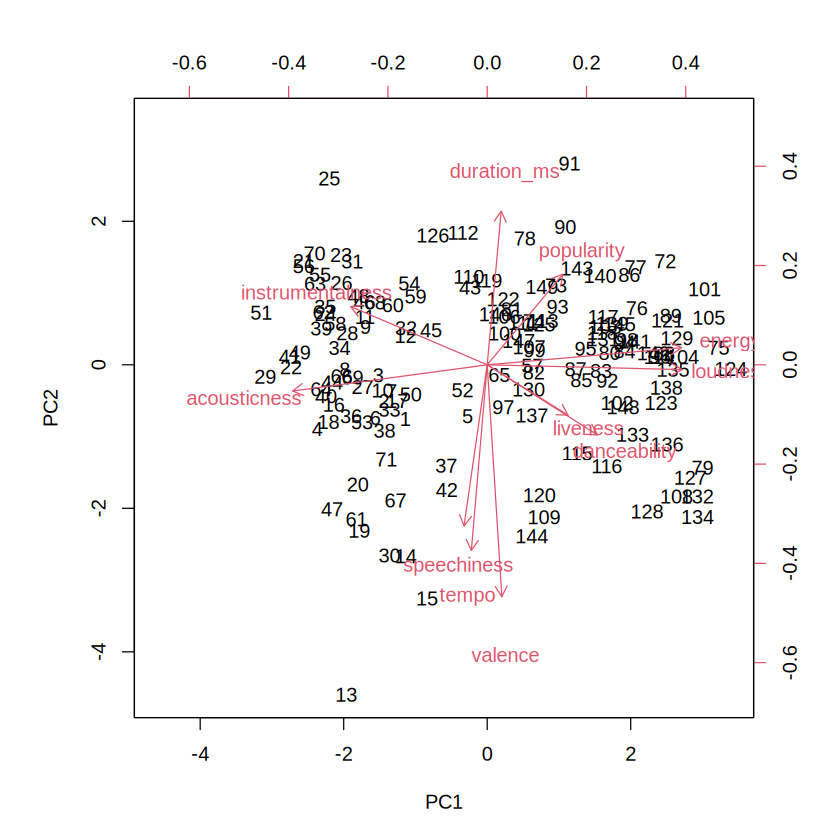

In [88]:
# Calcular PCA
pca_result <- prcomp(scaled_df, scale = FALSE)

# Graficar los dos primeros componentes principales
biplot(pca_result, scale = 0)

pca_res <- prcomp(scaled_df, scale = FALSE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x


In [89]:
#Cálculo de la varianza explicada
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.31 0.12 0.11 0.10 0.09 0.08 0.07 0.05 0.05 0.02 0.01

Estos serian los datos sin escalar

    genre           artist_name         track_name          popularity   
 Length:149         Length:149         Length:149         Min.   : 0.00  
 Class :character   Class :character   Class :character   1st Qu.:29.00  
 Mode  :character   Mode  :character   Mode  :character   Median :41.00  
                                                          Mean   :38.83  
                                                          3rd Qu.:53.00  
                                                          Max.   :74.00  
  acousticness       danceability     duration_ms         energy       
 Min.   :0.000051   Min.   :0.0685   Min.   : 31787   Min.   :0.00211  
 1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787   1st Qu.:0.07260  
 Median :0.816000   Median :0.3770   Median :210960   Median :0.25500  
 Mean   :0.609778   Mean   :0.3926   Mean   :219232   Mean   :0.35131  
 3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773   3rd Qu.:0.59700  
 Max.   :0.996000   Max.   :0.8650   Max.   :86594

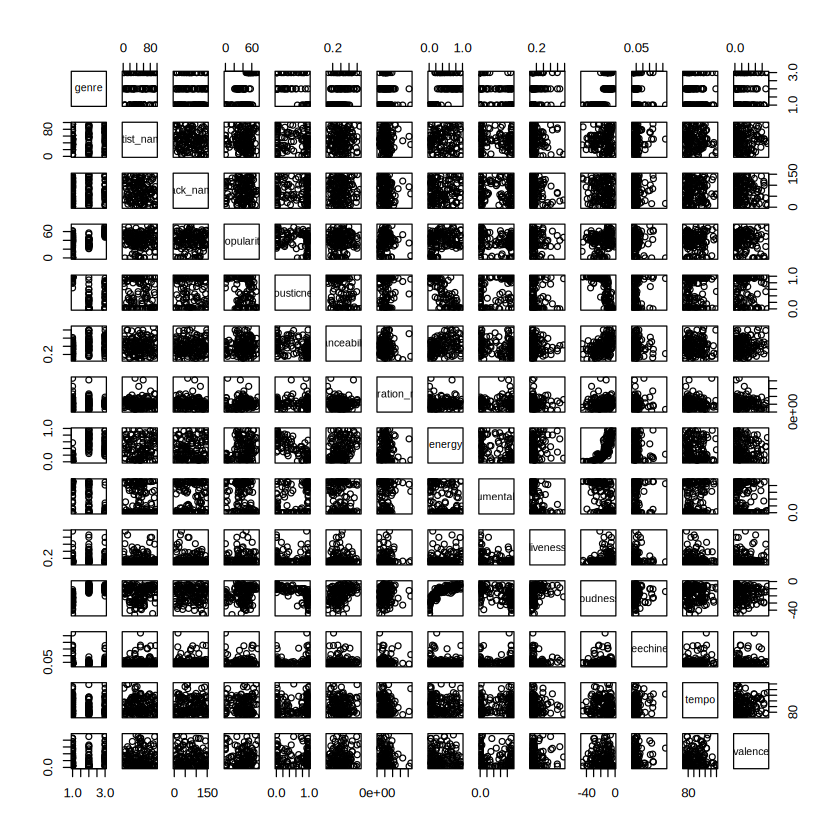

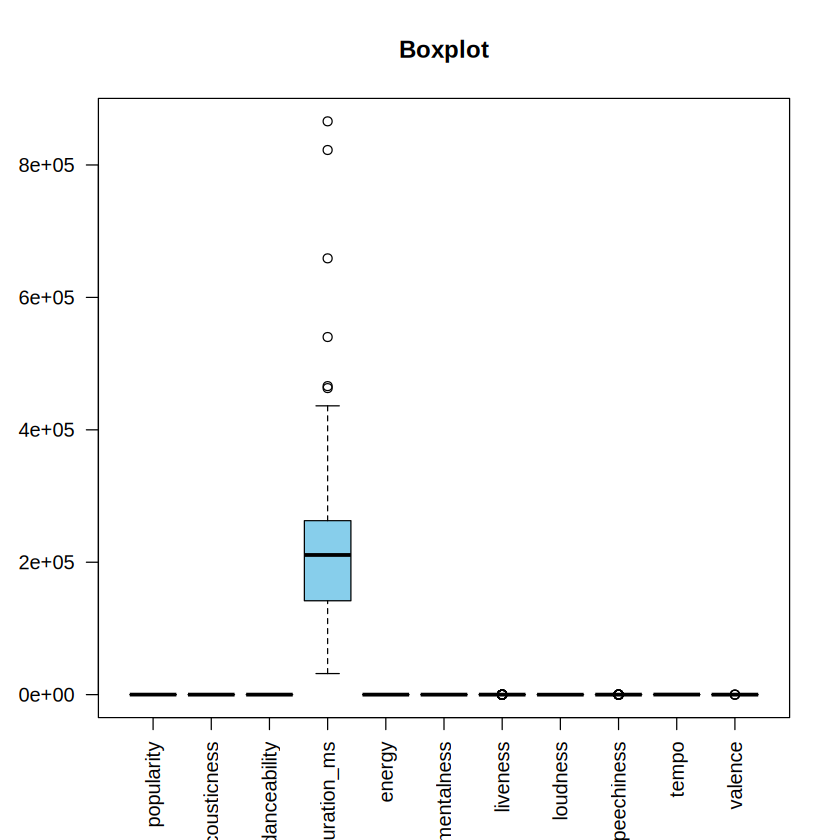

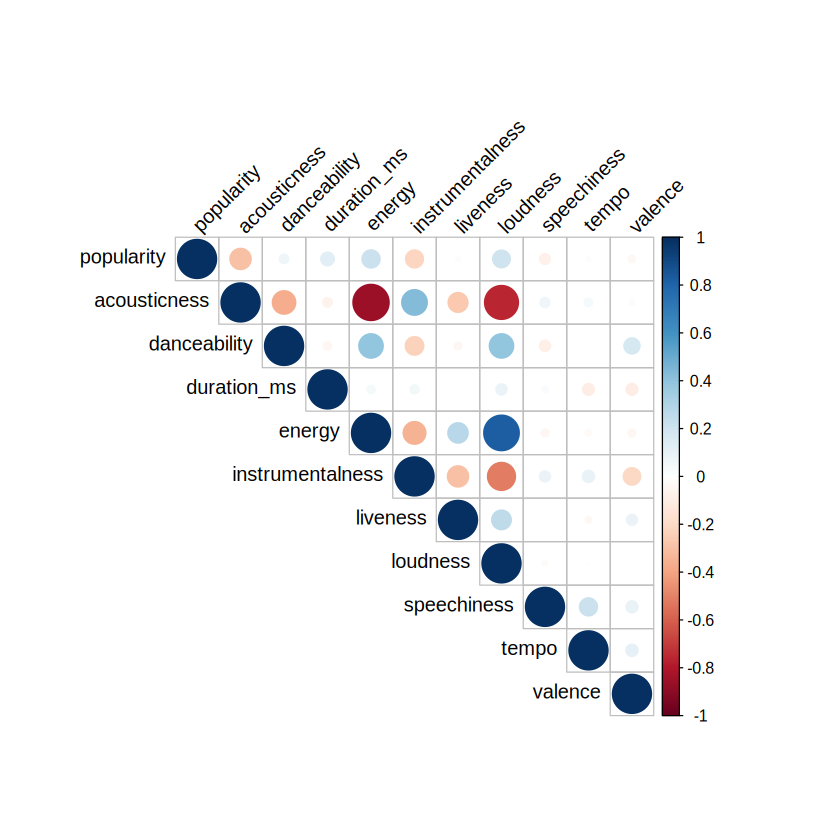

In [98]:
datos <- read.csv("../data/tiposMusica.csv",dec = ".", sep = ";", header = TRUE)

summary(datos)

plot(datos)

correlation_matrix <- cor(datos[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")]) # nolint
numeric_columns <- datos[, c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence")] # nolint
boxplot(numeric_columns, las = 2, col = "skyblue", main = "Boxplot") # nolint: line_length_linter.

library(corrplot)
corrplot(correlation_matrix, method="circle", type="upper", tl.col="black", tl.srt=45) # nolint


<h2> ii) </h2>

<b>Respecto a la casilla 95 y sus resultados: </b>

Como primera observacion, nos dimos cuenta que variables como duration, popularity, loudness, tempo tienen una varianza muy grande, algunas de estas incluso no tienen la misma escala, por esto es importante escalar los datos.

<b>Correlaciones negativas y positivas destacables entre variables: </b>

Al escalar los datos, observamos una correlación negativa entre acousticness y energy. Esto sugiere que las canciones que tienen muchos elementos acusticos no transmiten una gran energia.

Al escalar los datos, observamos una correlación negativa entre acousticness y loudness. Esto sugiere que las canciones que tienen muchos elementos acusticos no son muy ruidosas.

Al escalar los datos, observamos una correlación positiva entre energy y loudness. Esto suguiere que las canciones ruidosas transmiten una gran sensacion de energia.

<b>Respecto al boxplot </b>

Al escalar los datos se observa que acousticness, sigue teniendo una varianza considerable, dado que la mediana esta cerca cerca del tercer cuartil (y este esta cerca del cuarto) mientras que la distancia del tercer al segundo cuartil es considerable.

Al escalar los datos se observa que en liveness, speechiness y en duration_ms se observa una gran cantidad de datos atipicos, dados que estos superan los datos del cuarto cuartil (aunque en speechiness y en duration_ms es considerablemente menos)

<b> Respecto al PCA </b>

Se observa una correlaccion negativa entre duration_ms y speechness, tempo y valence. Esto dado que su vector tiene una direccion muy parecida, pero un sentido opuesto. Para speechness, tempo y valence se observa una relacion positiva ya que su vector tiene una direccion parecida y sentido parecido.

Se observa una correlaccion negativa entre instrumentalness y liveness y danceability. Esto dado que su vector tiene una direccion muy parecida, pero un sentido opuesto. Para liveness y danceability se observa una relacion positiva ya que su vector tiene una direccion parecida y sentido parecido.


La primera componente principal y la segunda explican un 31% y 12% de la variabilidad respectivamente. Sumando estos dos valores, nos da  un 43% de la variabilidad total
     